## Import all our pre-requisites

In [1]:
from string import ascii_lowercase
import itertools
# Create a list of the desired bigrams -- just the combinations of lowercase ascii letters ("ab", "cd", "xy", etc.)
# We are not here accounting for spaces, shifts, apostrophes, etc. (a limitation of time)
desiredBigrams = [ "%s%s" % x for x in list(itertools.product(ascii_lowercase, ascii_lowercase))]
import pandas as pd
from scipy.stats.mstats import zscore
from scipy.stats import kurtosis, skew

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from string import ascii_lowercase
import itertools
# Create a list of the desired bigrams -- just the combinations of lowercase ascii letters ("ab", "cd", "xy", etc.)
# We are not here accounting for spaces, shifts, apostrophes, etc. (a limitation of time)
desiredBigrams = [ "%s%s" % x for x in list(itertools.product(ascii_lowercase, ascii_lowercase))]

In [2]:
## Aalto data -- thanks to A. Feit

# Get the typing data -- just the cols we need
a = pd.read_table("106194.txt", usecols=[1, 6, 14])
b = pd.read_table("173269.txt", usecols=[1, 6, 14])
c = pd.read_table("216367.txt", usecols=[1, 6, 14])
d = pd.read_table("221357.txt", usecols=[1, 6, 14])
e = pd.read_table("372392.txt", usecols=[1, 6, 14])
f = pd.read_table("398591.txt", usecols=[1, 6, 14])
g = pd.read_table("438454.txt", usecols=[1, 6, 14])
h = pd.read_table("549687.txt", usecols=[1, 6, 15])
i = pd.read_table("760858.txt", usecols=[1, 6, 14])
j = pd.read_table("823773.txt", usecols=[1, 6, 14])
k = pd.read_table("915322.txt", usecols=[1, 6, 14])
l = pd.read_table("934313.txt", usecols=[1, 6, 14])

In [3]:
aalto_typing_data = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l])

# add the time difference from start of input -- this will be our proxy for difficulty
aalto_typing_data['Delta'] = aalto_typing_data['input_time'].diff()
# remove the first row which is has no delta -- it records the very first keystrike
aalto_typing_data.head()

,input_time,input,bigram,Delta
0,1.438250e+09,Shift_R,*Shift_R,NaN
1,1.438250e+09,d,Shift_Rd,0.218
2,1.438250e+09,o,do,0.312
3,1.438250e+09,w,ow,0.281
4,1.438250e+09,e,we,0.093


In [4]:
aalto_typing_data.drop(aalto_typing_data.index[0], inplace=True)
aalto_typing_data = aalto_typing_data[aalto_typing_data['bigram'].isin(desiredBigrams)]
# remove unneeded columns -- just leave the bigram and the delta (time diff)
aalto_typing_data.drop(aalto_typing_data.columns[[0, 1]], axis = 1, inplace=True)
aalto_typing_data.describe()

,Delta
count,7171.000000
mean,0.153691
std,0.108691
min,0.008000
25%,0.094000
50%,0.125000
75%,0.187000
max,3.120000


## Nursery Rhyme data -- thanks to V. Monaco

In [5]:
# Get the typing data -- just the cols we need
nr_typing_data = pd.read_csv("nr_keystroke.csv", usecols=["keyname", "timepress"])
nr_typing_data['Delta'] = nr_typing_data['timepress'].diff()/1000

tuple_list = zip(nr_typing_data["keyname"], nr_typing_data["keyname"][1:])
string_list = [""]
for t in tuple_list :
    string_list.append("%s%s" % t)
len(string_list)
nr_typing_data["bigram"]=string_list

# remove the first row which is has no delta -- it records the very first keystrike
nr_typing_data.drop(nr_typing_data.index[0], inplace=True)
nr_typing_data = nr_typing_data[nr_typing_data['bigram'].isin(desiredBigrams)]
# remove unneeded columns -- just leave the bigram and the delta (time diff)
nr_typing_data.drop(nr_typing_data.columns[[0, 1]], axis = 1, inplace=True)

nr_typing_data.describe()
# it's unusual to have so many IKI's at zero.  We'll drop values at or below 0

,Delta
count,7521.000000
mean,0.060038
std,0.147336
min,0.000000
25%,0.000000
50%,0.000000
75%,0.063000
max,3.400000


In [6]:
nr_typing_data = nr_typing_data[nr_typing_data['Delta']>0]
nr_typing_data.describe()

,Delta
count,1993.000000
mean,0.226565
std,0.210240
min,0.015000
25%,0.110000
50%,0.172000
75%,0.265000
max,3.400000


## Villani data -- thanks to V. Monaco

In [7]:
# Get the typing data -- just the cols we need
vil_typing_data = pd.read_csv("villani_keystroke.csv", usecols=["keyname", "timepress"])
vil_typing_data['Delta'] = vil_typing_data['timepress'].diff()/1000

tuple_list = zip(vil_typing_data["keyname"], vil_typing_data["keyname"][1:])
string_list = [""]
for t in tuple_list :
    string_list.append("%s%s" % t)
len(string_list)
vil_typing_data["bigram"]=string_list
# remove the first row which is has no delta -- it records the very first keystrike
vil_typing_data.drop(vil_typing_data.index[0], inplace=True)
vil_typing_data = vil_typing_data[vil_typing_data['bigram'].isin(desiredBigrams)]
# remove unneeded columns -- just leave the bigram and the delta (time diff)
vil_typing_data.drop(vil_typing_data.columns[[0, 1]], axis = 1, inplace=True)
vil_typing_data.to_csv("vil.csv")
# as we will see, we have some significant outliers.  We will throw out data that is at or below 0 or above 10 seconds.
vil_typing_data['Delta'].describe()

count     627591.000000
mean          10.890940
std         9707.109491
min     -2189285.177000
25%            0.110000
50%            0.160000
75%            0.219000
max      5839735.598000
Name: Delta, dtype: float64

In [8]:
vil_typing_data = vil_typing_data[vil_typing_data['Delta']>0]
vil_typing_data = vil_typing_data[vil_typing_data['Delta']<=10]
vil_typing_data['Delta'].describe()

count    627520.000000
mean          0.196647
std           0.190825
min           0.001000
25%           0.110000
50%           0.160000
75%           0.219000
max           9.860000
Name: Delta, dtype: float64

## Combine all our keystroke data into one dataframe

In [9]:
all_bigram_data = aalto_typing_data.append(nr_typing_data).append(vil_typing_data)

__Let's take a closer look at the compilation of all our keystroke / interkey interval data.__

In [10]:
all_bigram_data.describe()

,Delta
count,636684.000000
mean,0.196257
std,0.190223
min,0.001000
25%,0.110000
50%,0.157000
75%,0.219000
max,9.860000


__Let's get an idea of the overall quality of our data.  For each bigram, what's the mean, standard deviation, kurtosis, skewness?
We'll combine these in a data frame.__

In [11]:
bigram_count = pd.Series(all_bigram_data['Delta'].groupby(all_bigram_data['bigram']).count(), name="count")
bigram_mean = pd.Series(all_bigram_data['Delta'].groupby(all_bigram_data['bigram']).mean(), name="mean")
bigram_std  = pd.Series(all_bigram_data['Delta'].groupby(all_bigram_data['bigram']).std(), name="std")
bigram_sem  = pd.Series(all_bigram_data['Delta'].groupby(all_bigram_data['bigram']).sem(), name="sem")
bigram_skewness = pd.Series(all_bigram_data['Delta'].groupby(all_bigram_data['bigram']).apply(skew) , name="skew")
bigram_kurtosis = pd.Series(all_bigram_data['Delta'].groupby(all_bigram_data['bigram']).apply(kurtosis) , name="kurtosis")

__Looking at various aspects of the data will allow us to remove bigrams who have a large standard error, which could inidicate a too-small sample or a multimodal or very spread distribution (the bigram has different IKI for different groups, such as touch typers vs. hunt-and-peck typists), etc.  __

In [12]:
bigram_sem.describe()

count    632.000000
mean       0.041864
std        0.126035
min        0.000500
25%        0.005681
50%        0.018706
75%        0.047427
max        2.811334
Name: sem, dtype: float64

__Let's remove bigrams for which the standard error of the mean is greater than 0.05.__

In [13]:
bigram_sem = bigram_sem[bigram_sem <= 0.05]
bigram_sem.describe()

count    479.000000
mean       0.015355
std        0.012861
min        0.000500
25%        0.004529
50%        0.010620
75%        0.023299
max        0.049672
Name: sem, dtype: float64

In [14]:
bigram_count.describe()

count      654.000000
mean       973.522936
std       2238.262073
min          1.000000
25%         17.000000
50%         81.500000
75%       1006.500000
max      25500.000000
Name: count, dtype: float64

__Let's remove bigrams for which we have fewer than 30 IKI measurements, even if the standard error is low.__

In [15]:
bigram_count = bigram_count[bigram_count >=30]
bigram_count.describe()

count      432.000000
mean      1468.523148
std       2620.446923
min         30.000000
25%         84.750000
50%        428.000000
75%       1778.000000
max      25500.000000
Name: count, dtype: float64

__For now, we just show the other info, which may prove useful later.__

In [16]:
bigram_std.describe()

count    632.000000
mean       0.247021
std        0.267988
min        0.000707
25%        0.146261
50%        0.193702
75%        0.275161
max        4.869374
Name: std, dtype: float64

In [17]:
bigram_kurtosis.describe()

count     654.000000
mean       60.776281
std       143.803525
min        -3.000000
25%         1.050925
50%        13.592288
75%        55.387928
max      1531.678670
Name: kurtosis, dtype: float64

In [18]:
bigram_mean.describe()

count    654.000000
mean       0.261898
std        0.164206
min        0.018667
25%        0.187135
50%        0.231880
75%        0.303346
max        3.018333
Name: mean, dtype: float64

In [19]:
bigram_skewness.describe()

count    654.000000
mean       4.367364
std        4.538702
min       -1.646306
25%        1.228994
50%        3.295293
75%        5.944813
max       32.062669
Name: skew, dtype: float64

__We'll join these series using an inner join so that only the bigrams that passed both our count test and our kurtosis check will be included.__

In [20]:
bigram_info=pd.concat([bigram_count, bigram_sem, bigram_mean, bigram_std, bigram_skewness, bigram_kurtosis], axis=1, join='inner')

__What are we left with?  The length of the index should be considerably less than the original 600+.__

In [21]:
bigram_info.index

Index([u'ab', u'ac', u'ad', u'ae', u'af', u'ag', u'ah', u'ai', u'aj', u'ak',
       ...
       u'ys', u'yt', u'yu', u'yw', u'yy', u'za', u'ze', u'zi', u'zy', u'zz'],
      dtype='object', name=u'bigram', length=384)

__We'll write this info to a csv for use in other parts of this project.__

In [22]:
bigram_info.to_csv("bigram_info.csv")

__Aside: Let's take a look at some distributions of IKI to show unimodal vs. multimodal data:__

In [23]:
matplotlib.rcParams['figure.figsize'] = (20.0, 6.0)

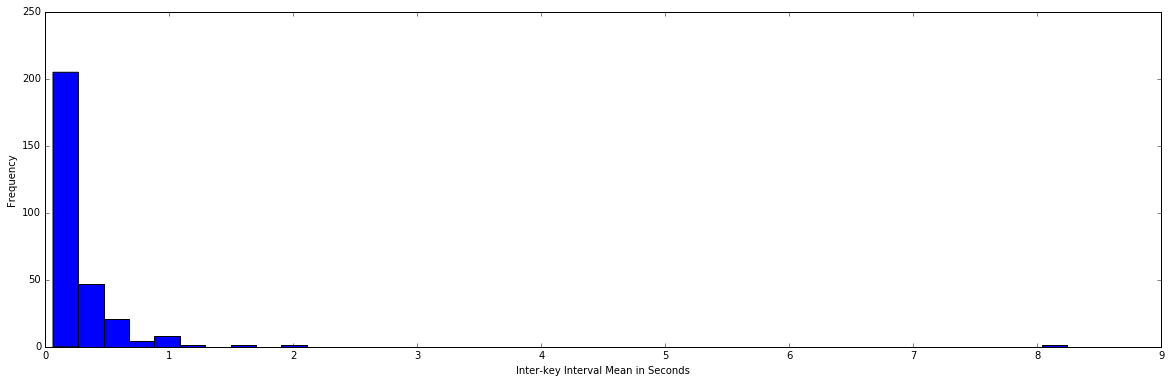

In [24]:
# "sn" is unimodal, but with a highly leveraged outlier.
plt.hist(all_bigram_data.Delta[all_bigram_data.bigram == "sn"], bins = 40)
plt.xlabel('Inter-key Interval Mean in Seconds')
plt.ylabel('Frequency')
plt.show()

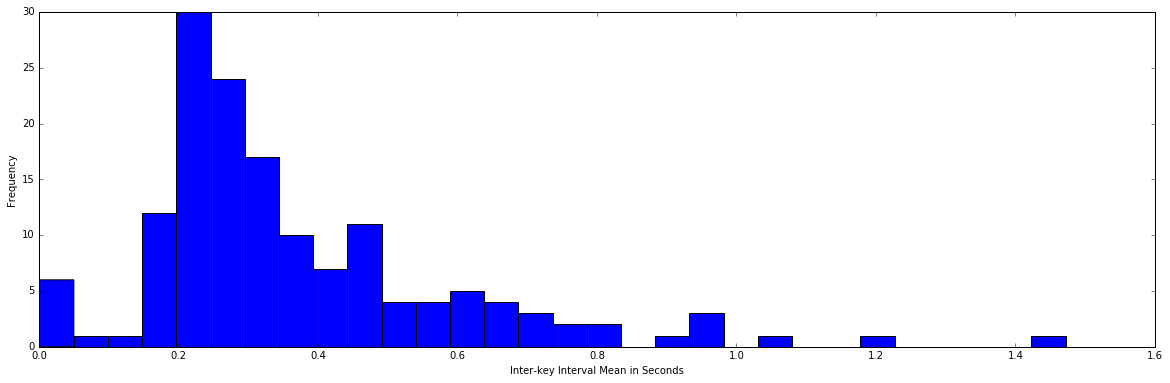

In [25]:
# "nj" is unimodal and has a close to normal distribution
plt.hist(all_bigram_data.Delta[all_bigram_data.bigram == "nj"], bins = 30)
plt.xlabel('Inter-key Interval Mean in Seconds')
plt.ylabel('Frequency')
plt.show()

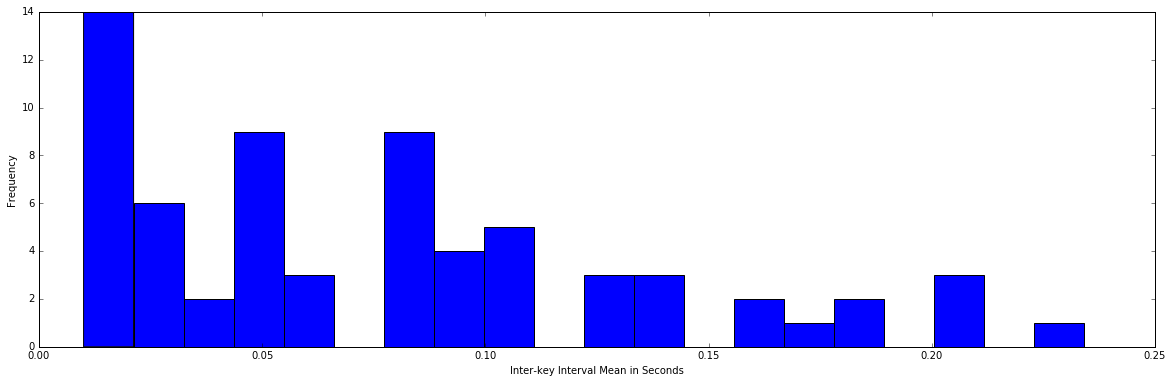

In [26]:
# "fj" is multi-modal.
plt.hist(all_bigram_data.Delta[all_bigram_data.bigram == "fj"], bins = 20)
plt.xlabel('Inter-key Interval Mean in Seconds')
plt.ylabel('Frequency')
plt.show()